# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence.


<img src="https://i.imgur.com/49FNOHj.jpg"/>
```
# This is formatted as code
```



# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

ow many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
colors_df = pd.read_csv("/content/drive/MyDrive/Data Analysis Project/LEGO Project/data/colors.csv")
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [ ]:
colors_df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>.

In [ ]:
colors_df[colors_df["is_trans"]=='f']["is_trans"].count()

107

In [ ]:
colors_df[colors_df["is_trans"]=='t']["is_trans"].count()

28

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

<img src='https://i.imgur.com/whB1olq.png'/>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src='https://i.imgur.com/aKcwkSx.png'/>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

In [ ]:
sets = pd.read_csv("/content/drive/MyDrive/Data Analysis Project/LEGO Project/data/sets.csv")
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [ ]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In which year were the first LEGO sets released and what were these sets called?

In [ ]:
released_year = sets.sort_values("year")["year"].iloc[1]
released_year

1949

In [ ]:
sets[sets["year"]==released_year]["name"]

9521           Extra-Large Gift Set (ABB)
9534                 Large Gift Set (ABB)
9539                Medium Gift Set (ABB)
9544                Small Brick Set (ABB)
9545    Small Doors and Windows Set (ABB)
Name: name, dtype: object

How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [ ]:
sets[sets["year"]==released_year]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


Find the top 5 LEGO sets with the most number of parts. 

In [ ]:
top_lego_sets = sets.sort_values("num_parts", ascending=False)
top_lego_sets.head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


Show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019.

In [ ]:
sets_by_year = sets.groupby("year").count()
sets_by_year.head()

In [ ]:
sets_by_year.tail()

Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slcing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [ ]:
new_sets = sets.groupby("year").count().iloc[:-2,:]
new_sets.tail()

,set_num,name,theme_id,num_parts
year,,,,
2015,774,774,774,774
2016,757,757,757,757
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


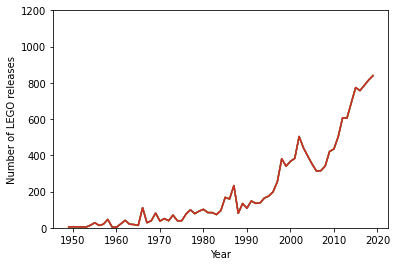

In [ ]:
plt.xlabel("Year")
plt.ylabel("Number of LEGO releases")
plt.ylim(0,1200)
plt.plot(new_sets)

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [ ]:
themes = pd.read_csv("/content/drive/MyDrive/Data Analysis Project/LEGO Project/data/themes.csv")
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [ ]:
# remove na values
themes = themes.fillna(0)
themes.head()

,id,name,parent_id
0,1,Technic,0.0
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [ ]:
themes_data = sets.groupby("year").agg({"theme_id": pd.Series.nunique})
themes_data.head()

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [ ]:
themes_data.rename(columns={"theme_id": "nr_themes"},  inplace = True)
themes_data.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [ ]:
themes_data.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

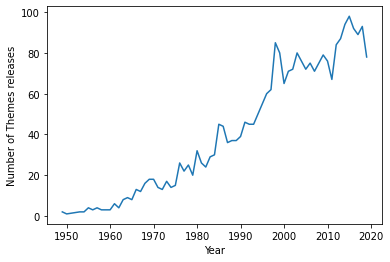

In [ ]:
themes_data_2 = themes_data.iloc[:-2,:]
plt.xlabel("Year")
plt.ylabel("Number of Themes releases")

plt.plot(themes_data_2)

### Line Charts with Two Seperate Axes

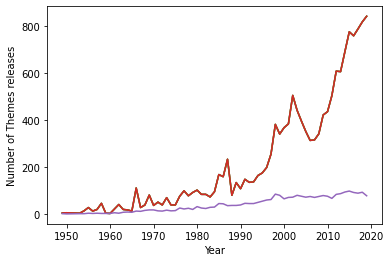

In [ ]:
plt.xlabel("Year")
plt.ylabel("Number of Themes releases")

plt.plot(new_sets)
plt.plot(themes_data_2)

Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

Text(0, 0.5, 'Number of Themes')

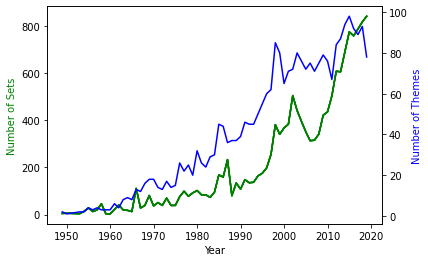

In [ ]:
ax1 = plt.gca() # get the axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(new_sets, color = 'g')
ax2.plot(themes_data_2, color = 'b')

ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Sets", color="green")
ax2.set_ylabel("Number of Themes", color='blue')

### Scatter Plots in Matplotlib

Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot.

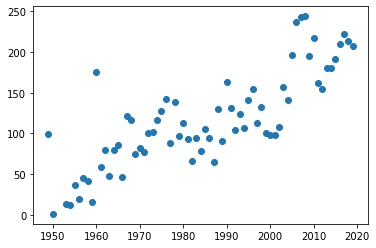

In [ ]:
parts_per_set = sets.groupby("year").agg({"num_parts": "mean"})

plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [ ]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? 

In [ ]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [ ]:
themes[themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,0.0
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [ ]:
sets.rename(columns={"theme_id": "id"}, inplace=True)
merged_sets = sets.merge(themes, on='id')
merged_sets.head()

,set_num,name_x,year,id,num_parts,name_y,parent_id
0,001-1,Gears,1965,1,43,Technic,0.0
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,Technic,0.0
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,191,Technic,0.0
3,1038-1,ERBIE the Robo-Car,1985,1,120,Technic,0.0
4,1039-1,Manual Control Set 1,1986,1,39,Technic,0.0


In [ ]:
starwar_df = []
for id in themes[themes.name == 'Star Wars'].id:
  print(merged_sets.loc[merged_sets.id == id, 'name_x'].values)

['R2-D2 / C-3PO Droid Collectors Set' 'Pit Droid' 'Battle Droid'
 'Destroyer Droid' 'C-3PO' 'Stormtrooper' 'R2-D2' 'Darth Vader'
 'Jango Fett' 'Super Battle Droid' 'Darth Vader / Stormtrooper Kit']
['Star Wars: Build Your Own Adventure'
 'Parts for Star Wars Build Your Own Adventure: Galactic Missions'
 'Clone Turbo Tank - Mini' 'Republic Attack Cruiser - Mini'
 'AT-TE Walker - Mini' 'Republic Gunship - Mini' 'Imperial Shuttle - Mini'
 'AT-AT Walker - Mini' 'Slave I' 'Bounty Hunter Gunship - Mini'
 'Stormtrooper' 'White Boba Fett Figure' 'Shadow ARF Trooper'
 'Battle Droid on STAP' 'Imperial Speeder Bike' 'Clone Walker'
 'Republic Attack Shuttle - Mini' 'X-wing Fighter - Mini' 'AAT'
 'Republic Attack Cruiser - Mini' 'AT-ST - Mini' 'Vulture Droid - Mini'
 'Star Destroyer' "Anakin's Pod Racer" 'STAP' 'MTT' 'Z-95 Headhunter'
 'Mandalorian Fighter' 'Republic Frigate' 'Umbaran MHC'
 "Anakin's Jedi Intercepter" 'Imperial Shuttle' 'ARC-170 Starfighter'
 'A-Wing Starfighter' 'AT-DP' 'TIE Advan

### Merging (i.e., Combining) DataFrames based on a Key


In [ ]:
set_theme_count = sets.id.value_counts()
set_theme_count.head()

158    753
501    656
494    398
435    356
503    329
Name: id, dtype: int64

In [ ]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index,
                               'set_count': set_theme_count.values})
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [ ]:
merged_count = set_theme_count.merge(themes, on='id')
merged_count[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,0.0
1,501,656,Gear,0.0
2,494,398,Friends,0.0


<BarContainer object of 10 artists>

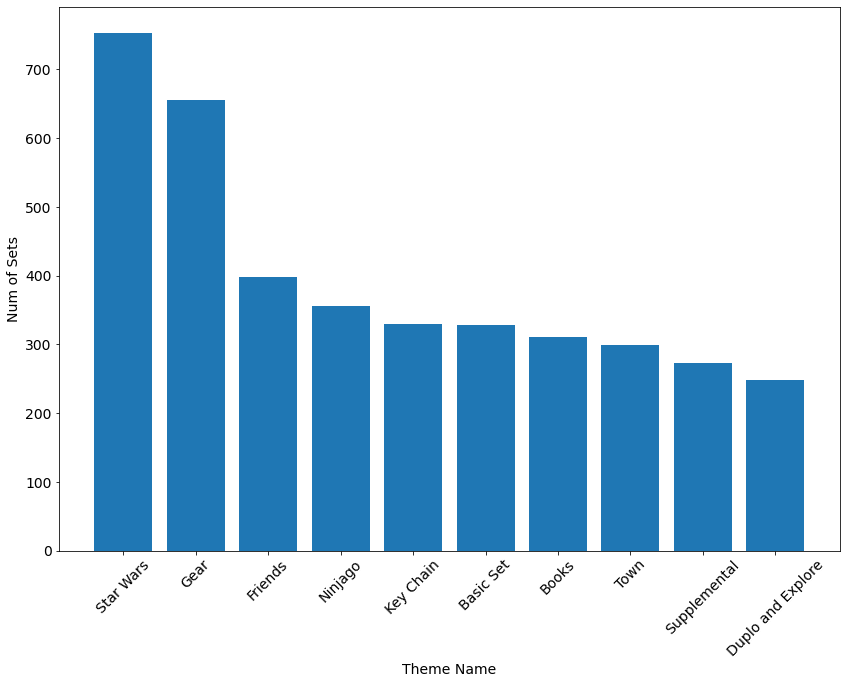

In [ ]:
plt.figure(figsize=(14,10))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Num of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_count.name[:10], merged_count.set_count[:10])